# Recreate Figure 5 from Kay, 2012 (COSP vs. CAM4/5)

### Add paths to run locally or off Cheyenne or Casper 
(what is the difference between these two again?)

In [1]:
import sys
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/CESM2_analysis/Common/')
# sys.path.append("/home/jonahks/git_repos/netcdf_analysis/Common/")

from imports import (
    pd, np, xr, mpl, plt, sns, os, 
    datetime, sys, crt, gridspec,
    ccrs, metrics, Iterable, cmaps
    )

from functions import (
    masked_average, add_weights, sp_map,
    season_mean, get_dpm, leap_year, share_ylims,
    to_png
    )

from cloud_metric import Cloud_Metric
from collections import deque
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Check running location and adjust working directory appropriately.

In [2]:
host = os.uname()[1]
if 'jupyter' in host.split('-'): # Check if running on NIRD through the Jupyter Hub
    print('Running through MC2 Jupyter Hub')
    
elif 'casper' in host: # Check if running on NIRD through the Jupyter Hub
    print('Running through CISL Casper')
    
elif 'r6i6' in host: # Check if running on NIRD through the Jupyter Hub
    print('Running through CISL Cheyenne')
    
else:  # Assume that we're running on a local machine and mounting NIRD
    print('Running on %s, attempting to mount ns9600k/jonahks/ from NIRD' % str(host))
    os.system('fusermount -zu ~/drivemount/')  # unmount first
    os.system('sshfs jonahks@login.nird.sigma2.no:"p/jonahks/" ~/drivemount/')    # Calling mountnird from .bashrc doesn't work
    os.chdir('/home/jonahks/drivemount/')
    save_dir = '~/DATAOUT/'
    save_to = os.path.expanduser(save_dir)



Running through CISL Casper


### Find the files

In [3]:
case_dir = '/glade/scratch/jonahshaw/archive/Kay_COSP_2012/'

In [4]:
os.chdir(case_dir)

In [5]:
os.listdir()

['cam5_1deg_release_amip', 'cam4_1deg_release_amip']

### Load post-processed CAM4 and CAM5 files into a cloud metric

In [6]:
fig5metric = Cloud_Metric(case_dir)
fig5metric.add_case('cam4_1deg_release_amip',label='CAM4')
fig5metric.add_case('cam5_1deg_release_amip',label='CAM5')

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Processed timeseries directory found for cam4_1deg_release_amip. Will load data as required.
cam4_1deg_release_amip load successfully.
Processed timeseries directory found for cam5_1deg_release_amip. Will load data as required.
cam5_1deg_release_amip load successfully.


In [7]:
cam4metric = Cloud_Metric(case_dir)
cam4metric.add_case('cam4_1deg_release_amip',label='CAM4')

cam5metric = Cloud_Metric(case_dir)
cam5metric.add_case('cam5_1deg_release_amip',label='CAM5')

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Processed timeseries directory found for cam4_1deg_release_amip. Will load data as required.
cam4_1deg_release_amip load successfully.
Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...done.
Processed timeseries directory found for cam5_1deg_release_amip. Will load data as required.
cam5_1deg_release_amip load successfully.


/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

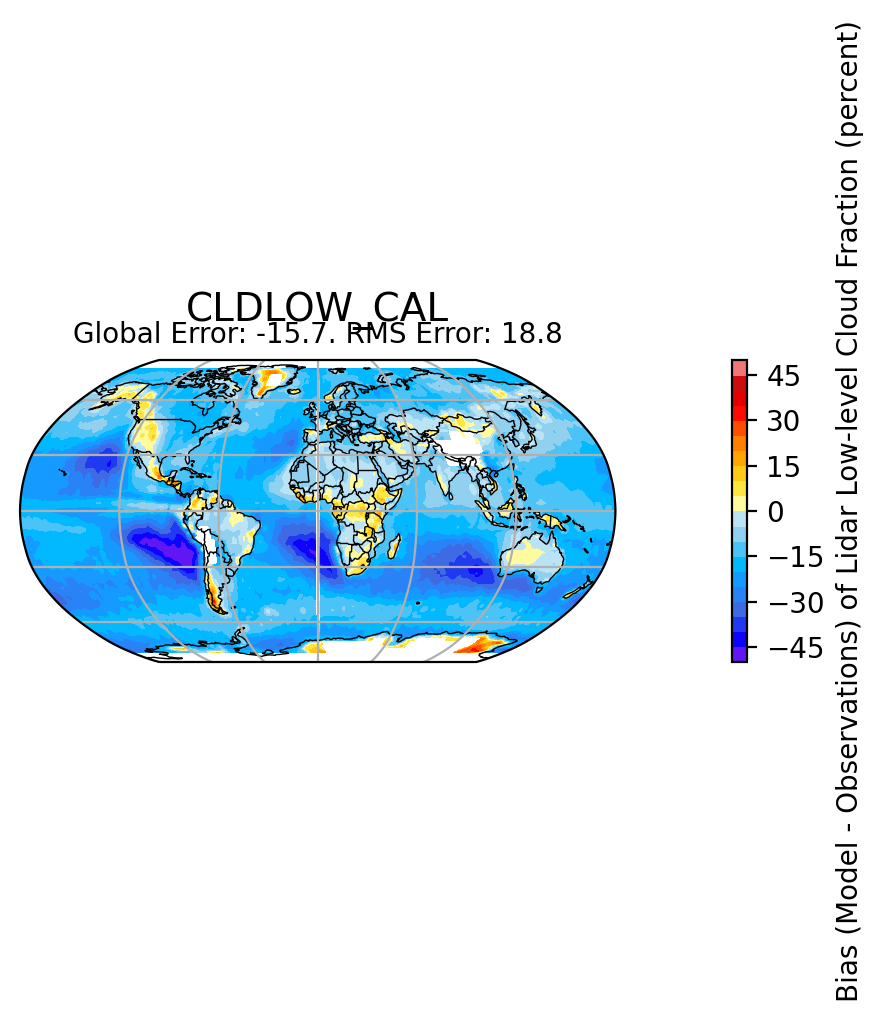

In [8]:
cldlow1 = cam4metric.plot2D('CLDLOW_CAL',bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')

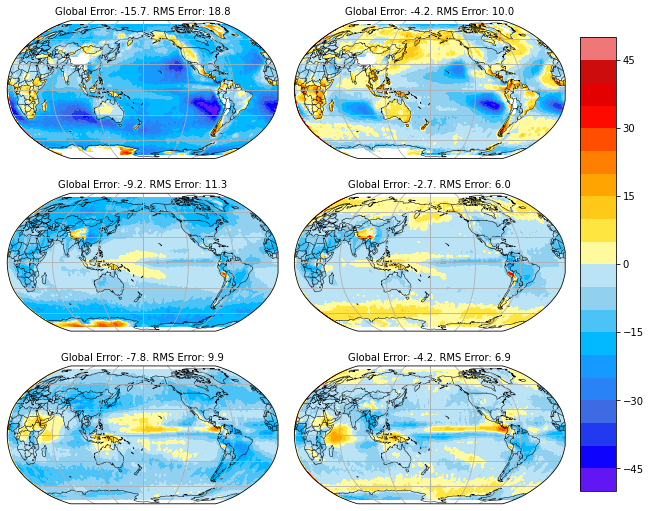

In [67]:
fig

In [68]:
to_png(fig,"kay2012_fig5_py")

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

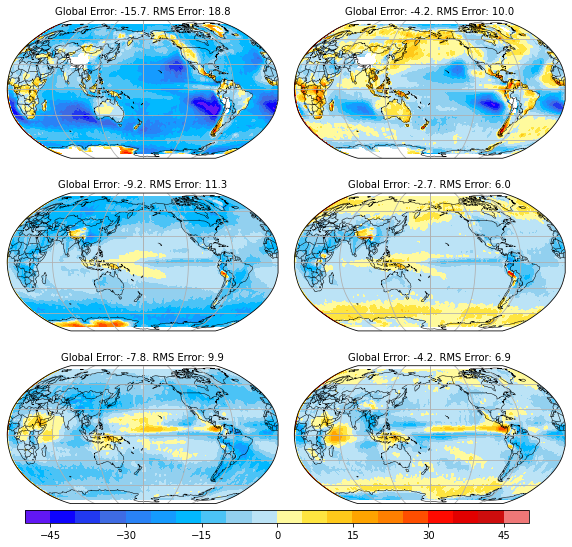

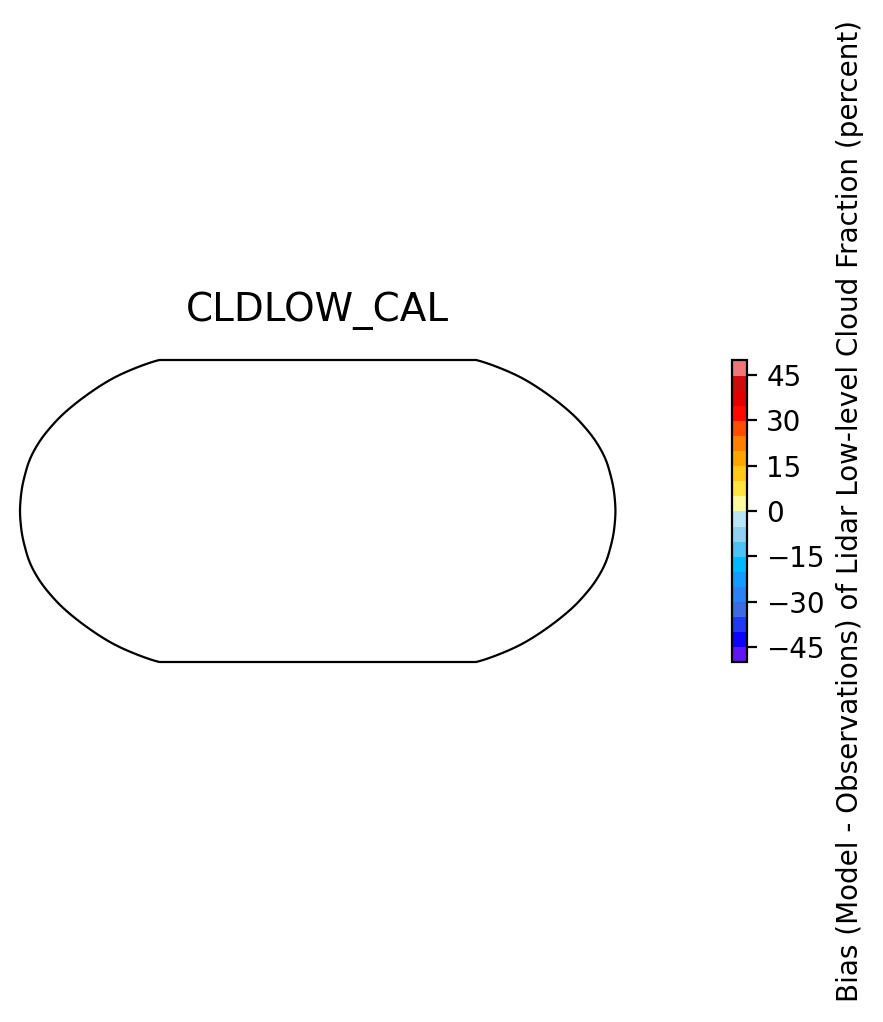

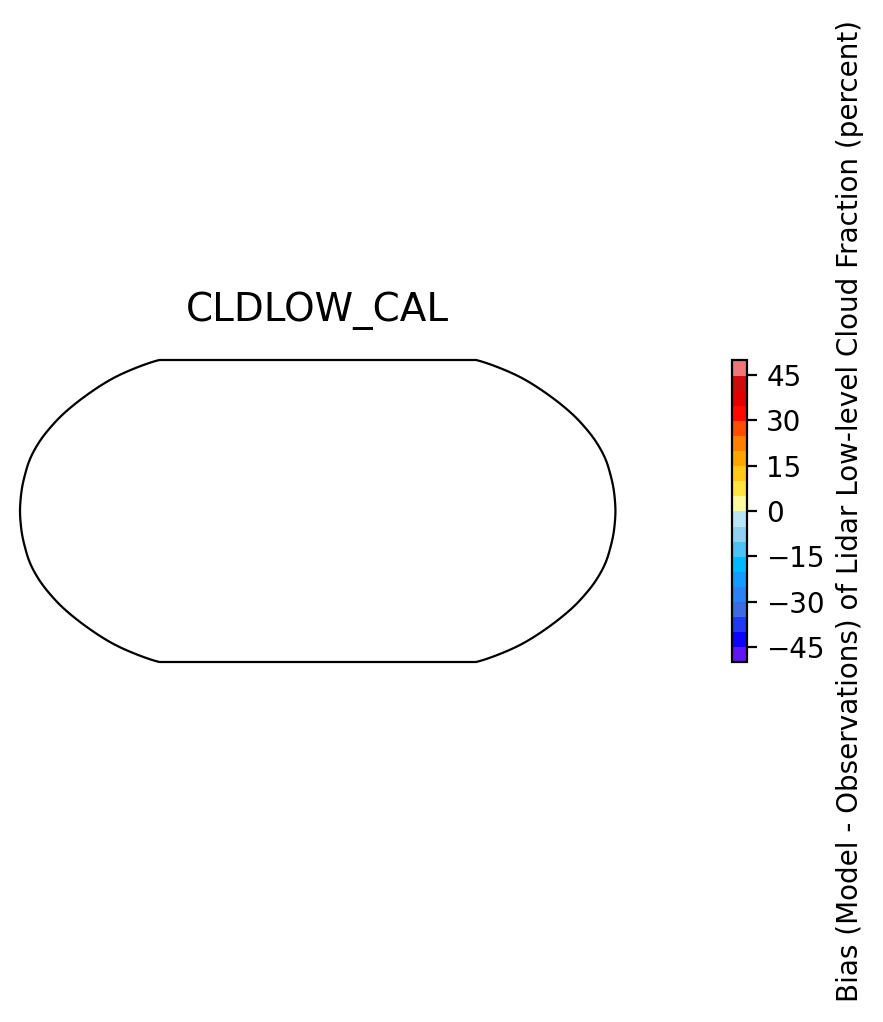

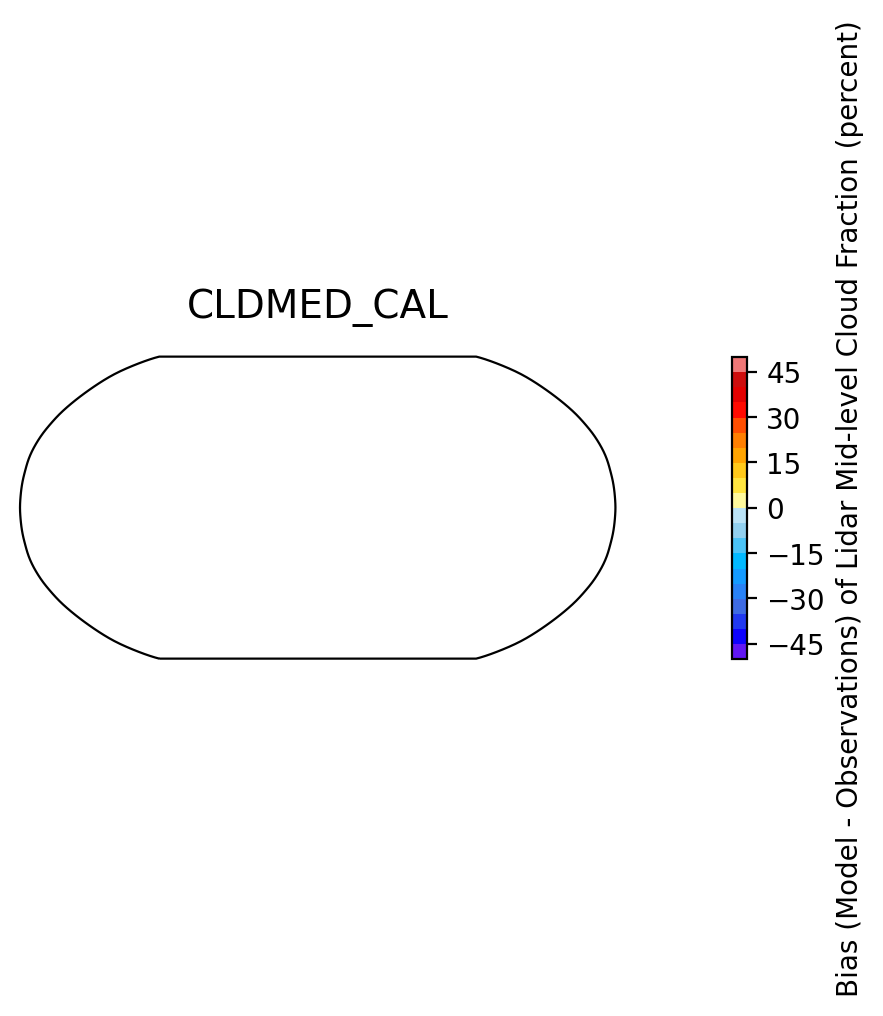

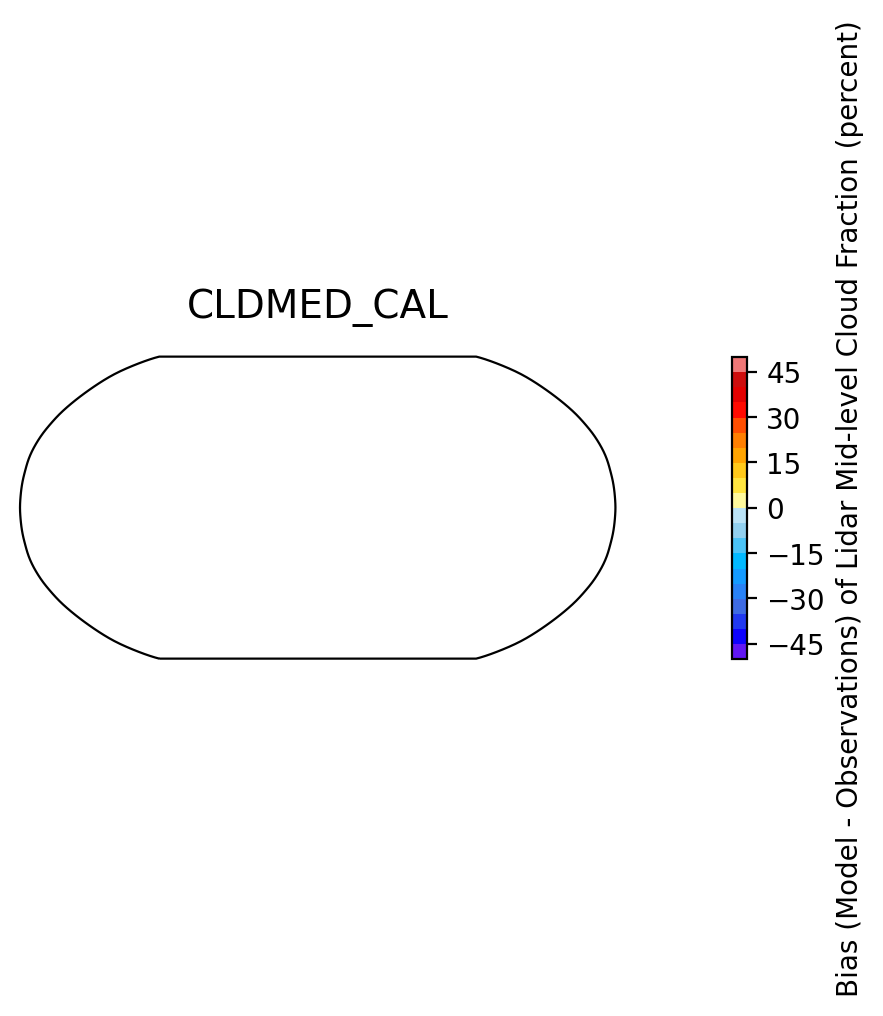

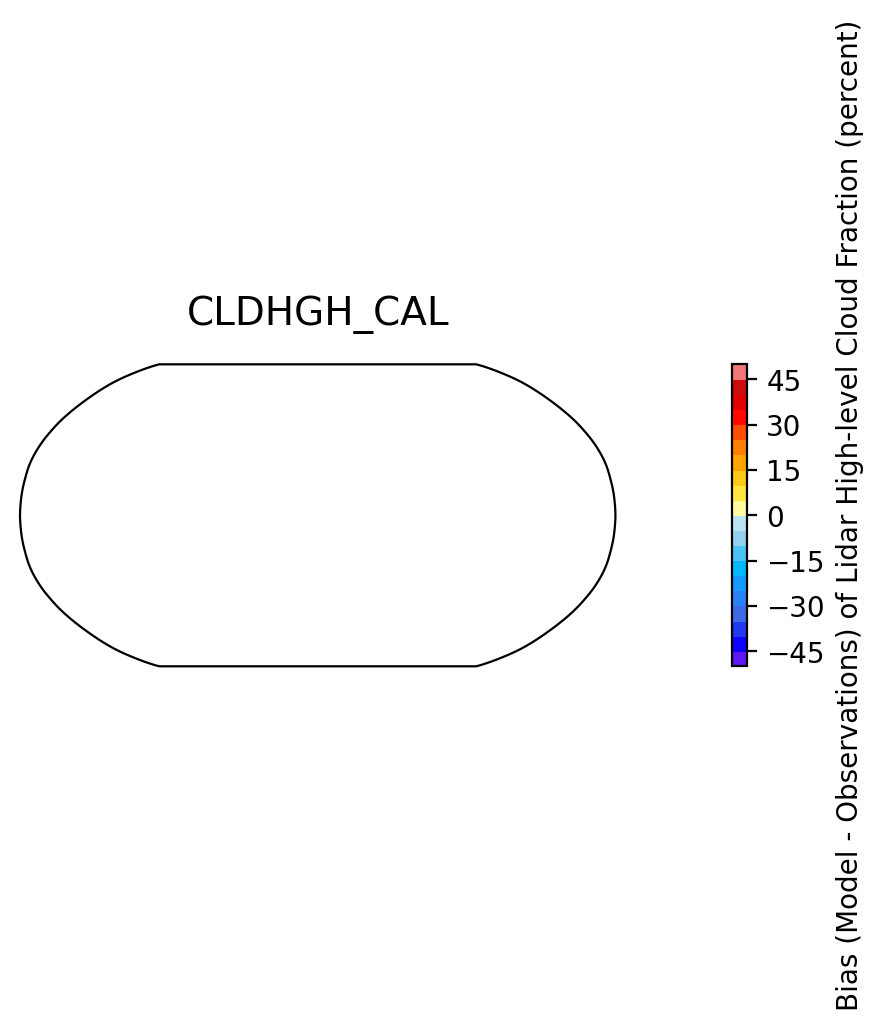

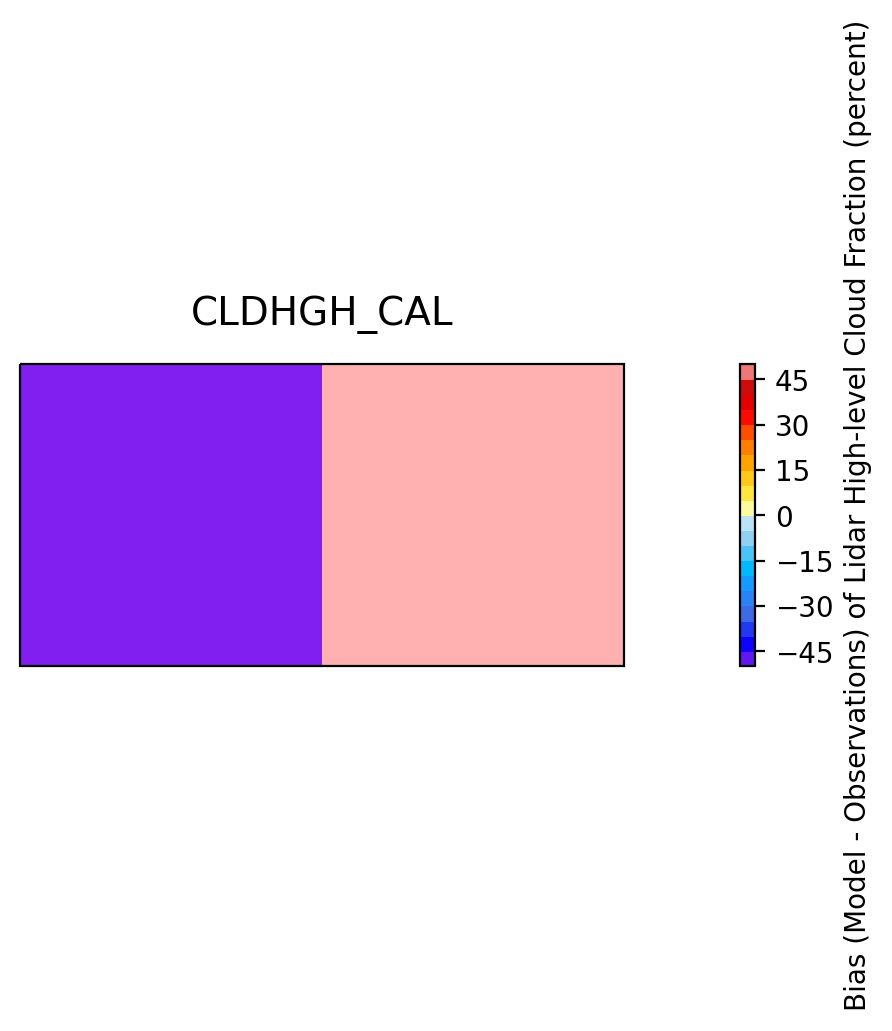

In [11]:
# fig,axs = plt.subplots(nrows=2,ncols=2,sharey='row')
fig, axs = sp_map(nrows=3, ncols=2, projection=ccrs.Robinson(central_longitude=180))#, figsize=[15,2*(len(self.cases))])

fig.set_figheight(9)
fig.set_figwidth(10)
# fig.set_dpi(200)

axs = axs.flat
fig.subplots_adjust(wspace=0.06)

cldlow1 = cam4metric.plot2D('CLDLOW_CAL',ax=[axs[0]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')
cldlow2 = cam5metric.plot2D('CLDLOW_CAL',ax=[axs[1]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')

cldmed1 = cam4metric.plot2D('CLDMED_CAL',ax=[axs[2]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')
cldmed2 = cam5metric.plot2D('CLDMED_CAL',ax=[axs[3]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')

cldhgh1 = cam4metric.plot2D('CLDHGH_CAL',ax=[axs[4]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')
cldhgh2 = cam5metric.plot2D('CLDHGH_CAL',ax=[axs[5]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')

a = np.array([[-50,50]])

img = plt.imshow(a, cmap=cmaps.ncl_default)

# cbar_ax = fig.add_axes([0.92, 0.15, 0.05, 0.70])
cbar_axh = fig.add_axes([0.15, 0.10, 0.70, 0.02])

fig.colorbar(cldhgh2[1], cax=cbar_axh,orientation='horizontal')

In [33]:
a

array([[-50,  50]])

In [34]:
np.linspace(-50,50,21)


array([-50., -45., -40., -35., -30., -25., -20., -15., -10.,  -5.,   0.,
         5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.])

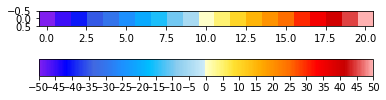

In [58]:
fig = plt.figure()
# a = np.array([[-50,50]])
#
a = np.array([np.linspace(-50,50,21)])

img = plt.imshow(a, cmap=cmaps.ncl_default)

# pl.colorbar(orientation="h", cax=cax)
# pl.savefig("colorbar.pdf")

# cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
cbar = fig.colorbar(img,orientation='horizontal',ticks=np.linspace(-50,50,21))

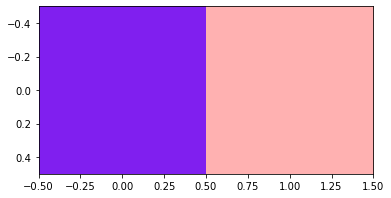

In [39]:
a = np.array([[-50,50]])
#
# a = np.array([np.linspace(-50,50,21)])

img = plt.imshow(a, cmap=cmaps.ncl_default)

# pl.colorbar(orientation="h", cax=cax)
# pl.savefig("colorbar.pdf")

# cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
cbar = fig.colorbar(img,orientation='horizontal')

TypeError: 'cmap' must be an instance of matplotlib.colors.Colormap or None, not a str

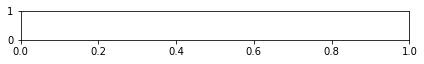

In [42]:
fig = plt.figure()
ax = fig.add_axes([0.05, 0.80, 0.9, 0.1])

cb = mpl.colorbar.ColorbarBase(ax, orientation='horizontal', 
                               cmap='Blues')

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

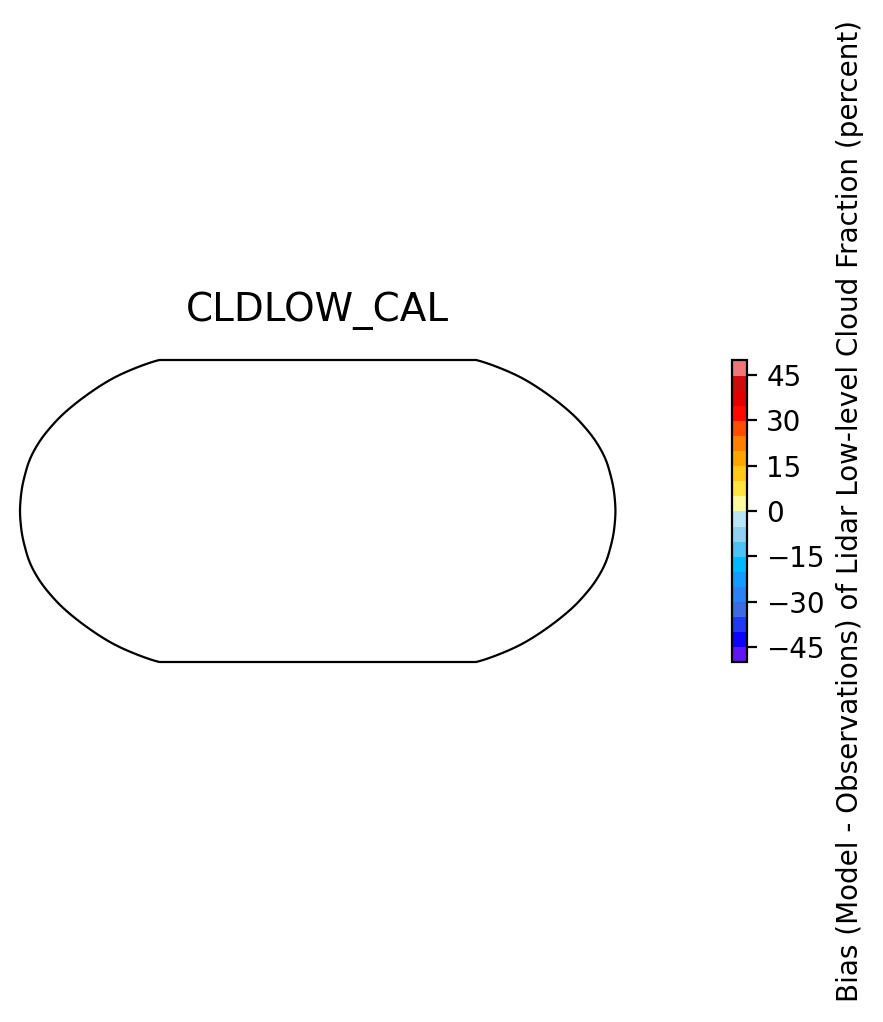

In [14]:
cldlow2 = cam5metric.plot2D('CLDLOW_CAL',ax=[axs[1]],bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Robinson')

# # Re-label
# fig.text(0.1, 0.5, r'Model Bias (Wm$^{-2}$)', va='bottom', ha='center', rotation='vertical', 
#          rotation_mode='anchor', fontsize=24)
# # fig.text(0.93, 0.7, r'Cloud Cover Bias (%)', va='bottom', ha='center', rotation='vertical', 
# #          rotation_mode='anchor', fontsize=18)
# # fig.text(0.93, 0.5, r'Cloud Cover Bias (%)', va='bottom', ha='center', rotation='vertical', 
# #          rotation_mode='anchor', fontsize=22)
# fig.text(0.5, 0.05, 'Month', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

# fig.text(0.15, 0.83, 'a.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.83, 'b.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.15, 0.42, 'c.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)
# fig.text(0.55, 0.42, 'd.', va='bottom', ha='center', rotation='horizontal', 
#          rotation_mode='anchor', fontsize=24)

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

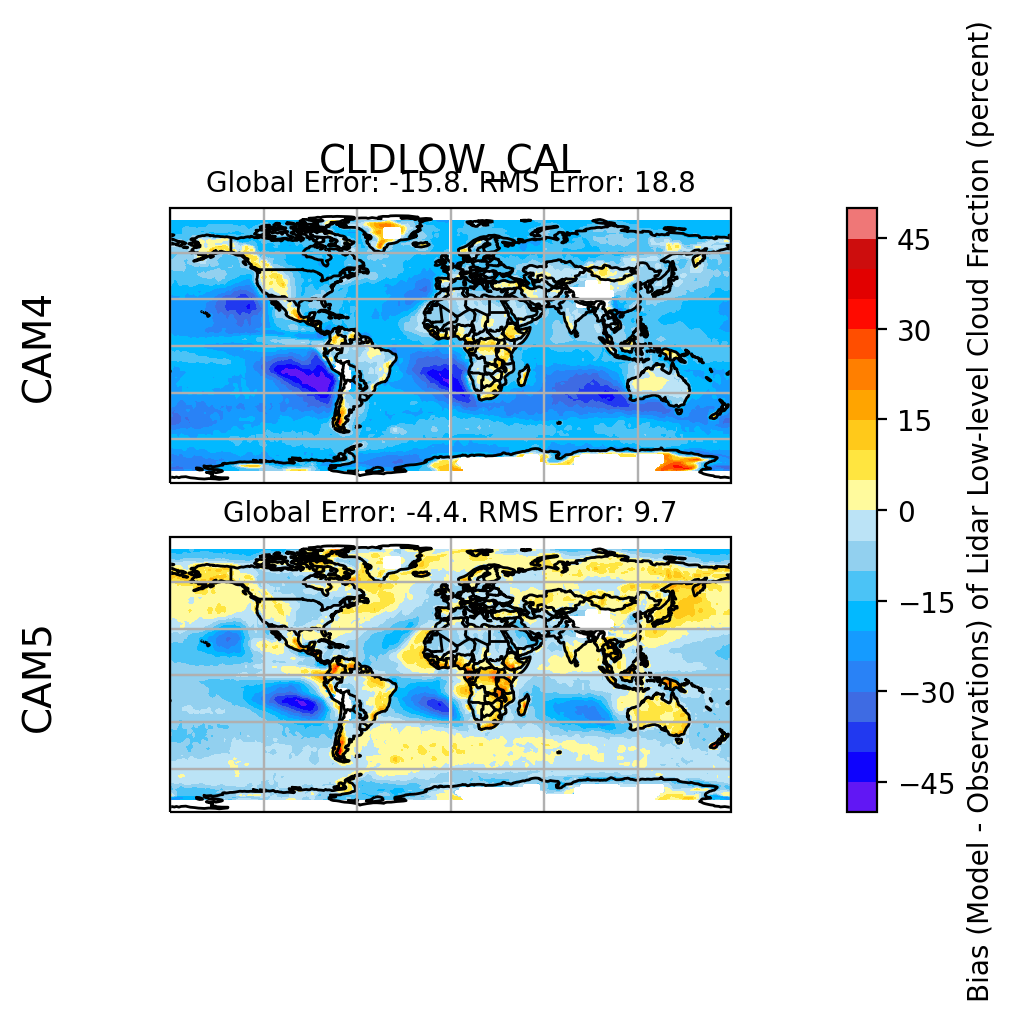

In [21]:
cldlow = fig5metric.plot2D('CLDLOW_CAL',layers=False,bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither')

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide

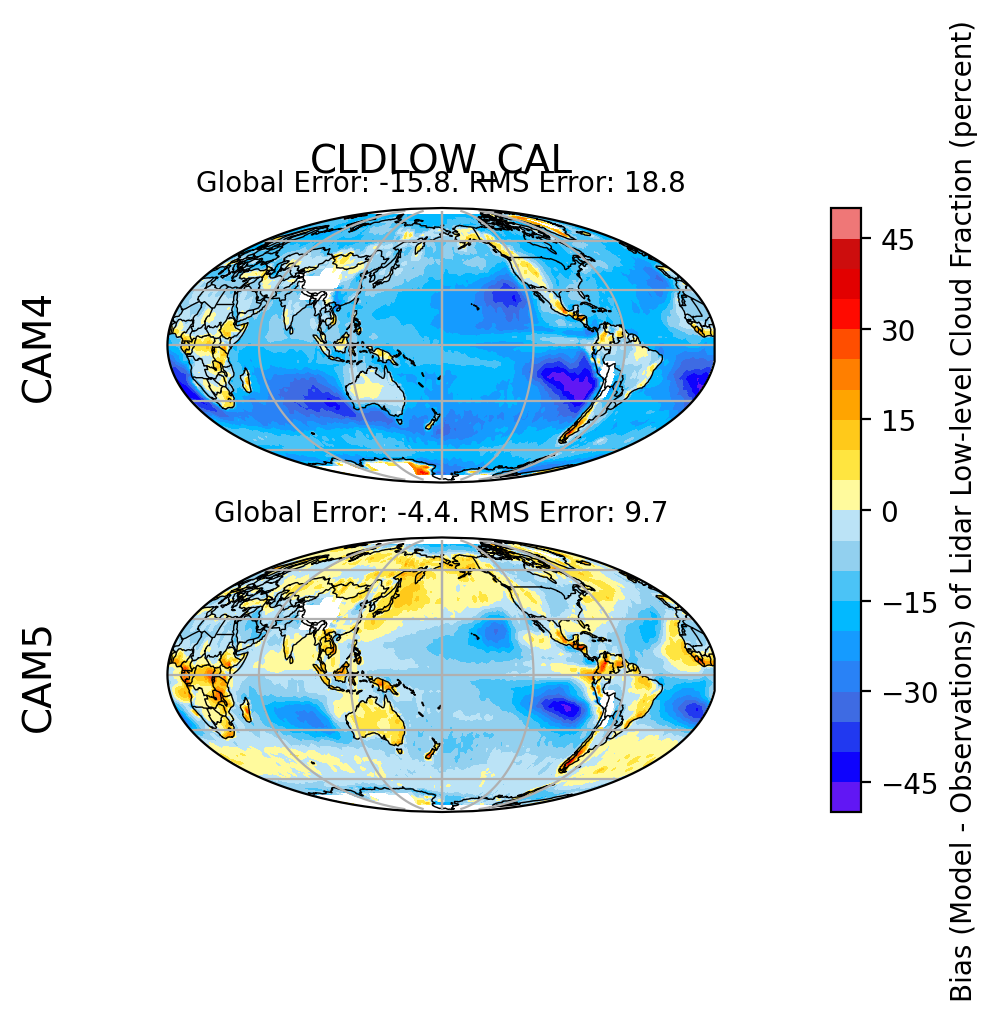

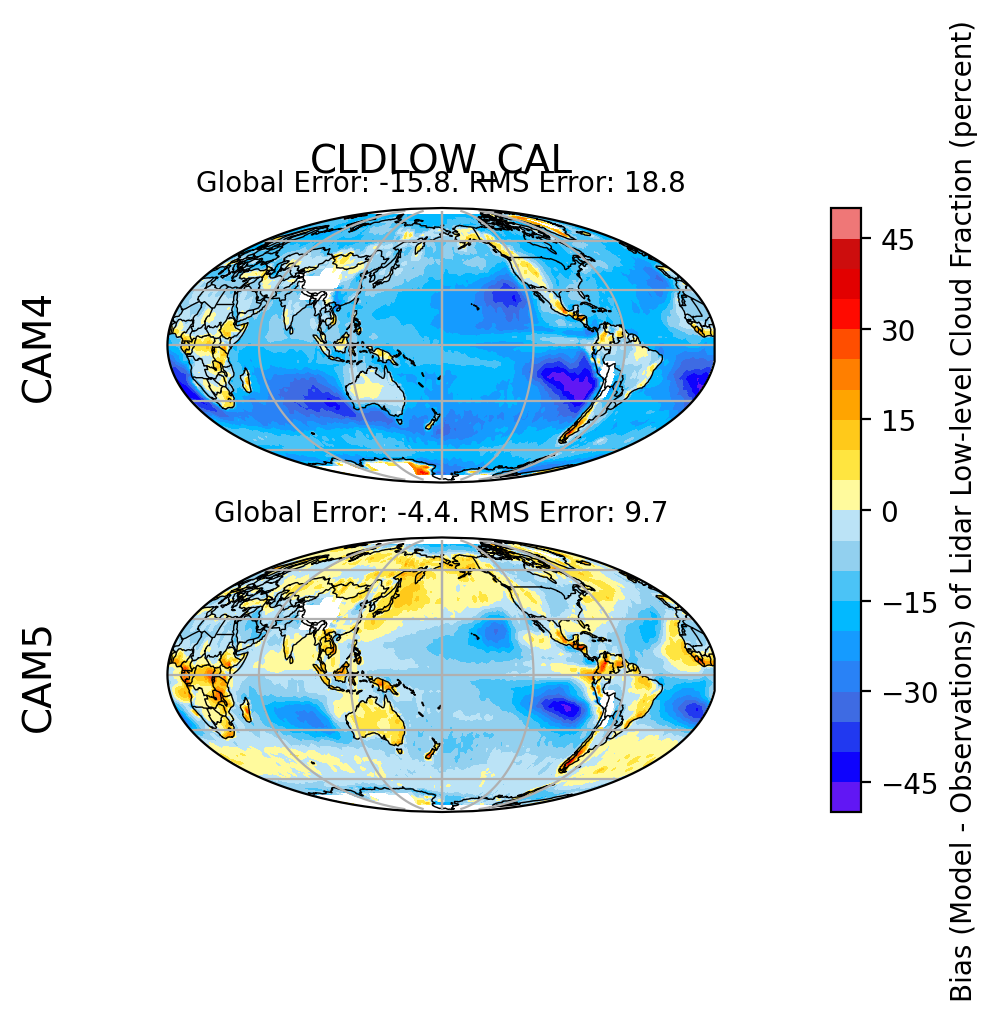

In [8]:
fig5metric.plot2D('CLDLOW_CAL',layers=False,bias=True,contour=True,levels=np.linspace(-50,50,21),extend='neither',projection='Mollweide')

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlab

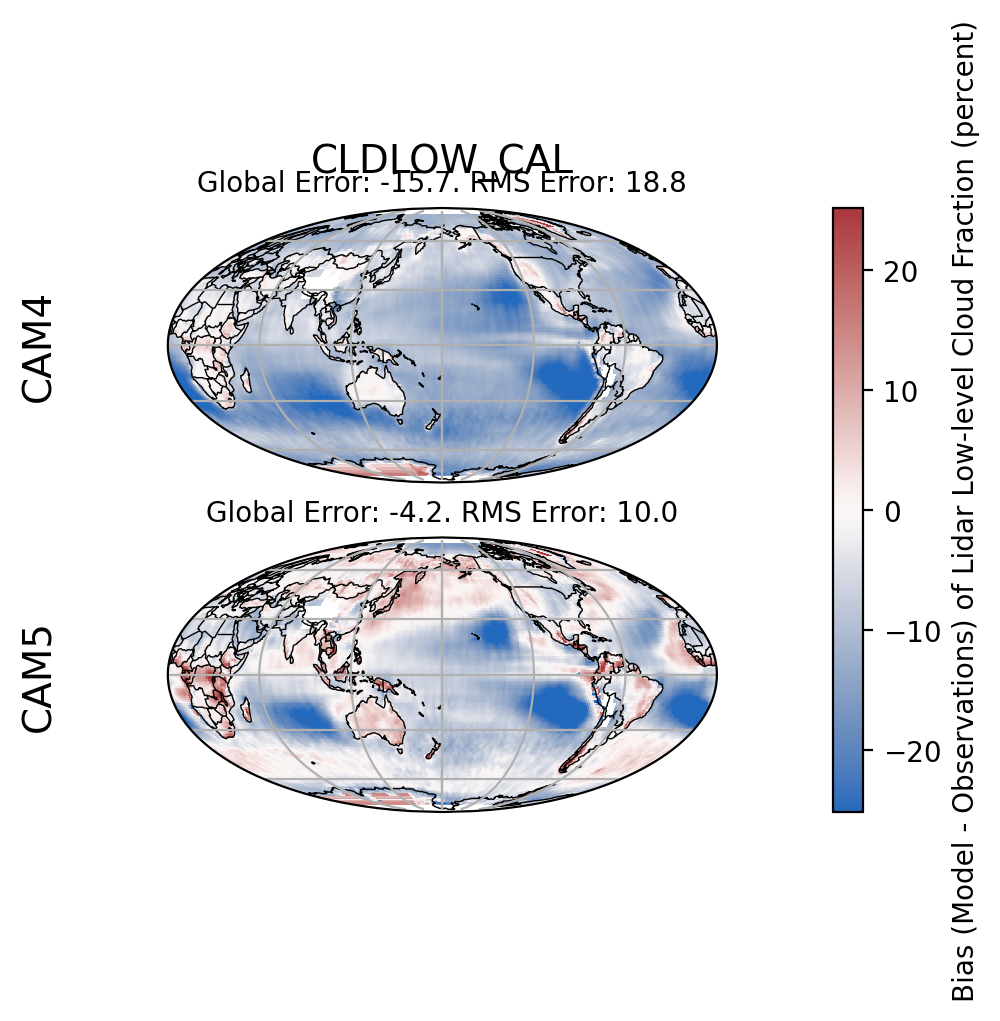

Error in callback <function flush_figures at 0x2ac822f087a0> (for post_execute):


KeyboardInterrupt: 

In [9]:
fig5metric.plot2D('CLDLOW_CAL',layers=False,bias=True,contour=False,projection='Mollweide')#,levels=np.linspace(-50,50,21),extend='neither',projection='Mollweide')

/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'robust', 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/glade/work/jonahshaw/miniconda3/envs/cheycomp/lib/python3.7/site-packages/cartopy

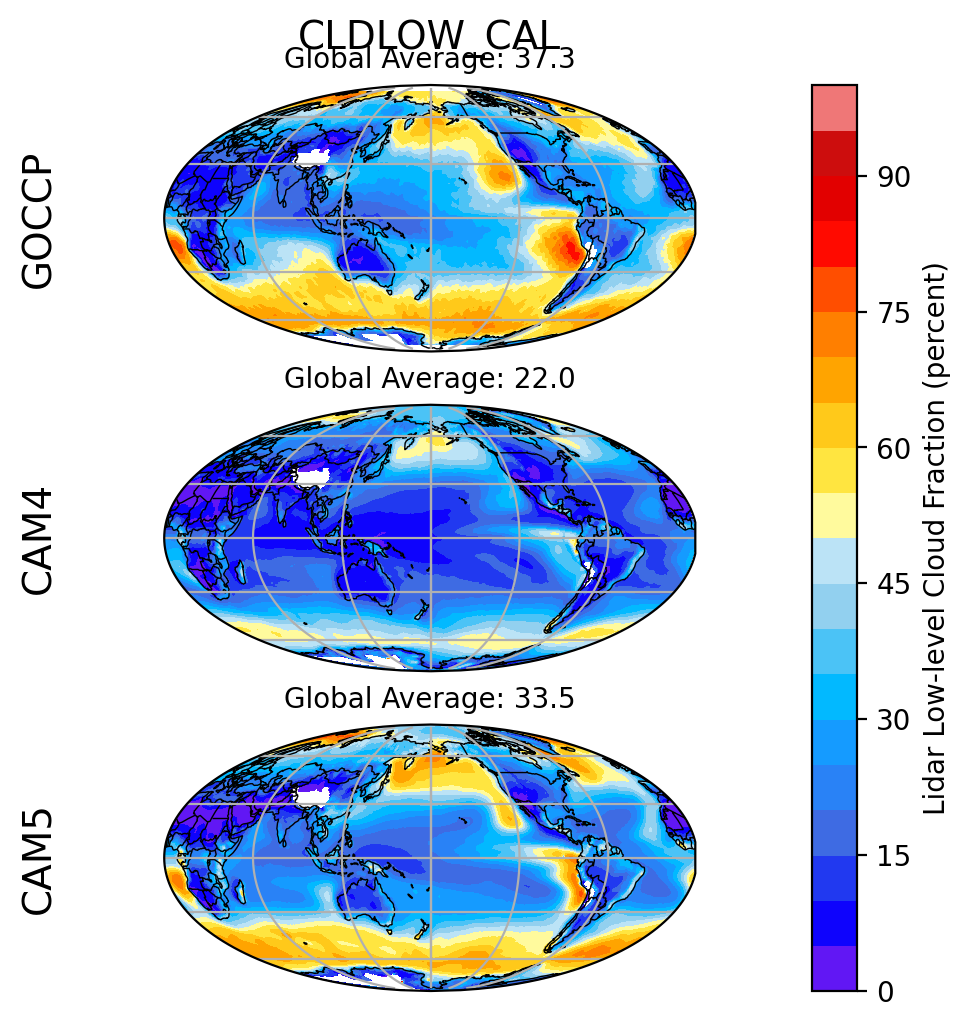

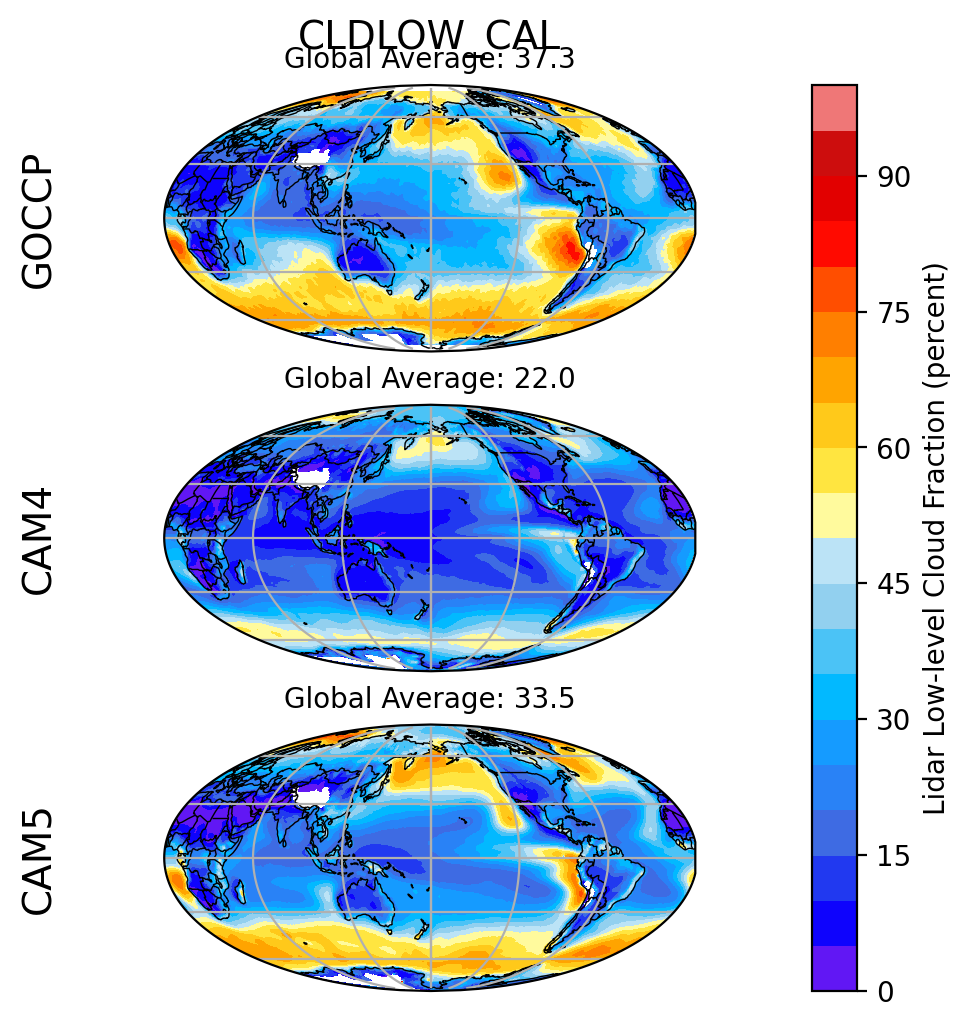

In [14]:
fig5metric.plot2D('CLDLOW_CAL',layers=False,bias=False,contour=True,levels=np.linspace(0,100,21),extend='neither',projection='Robinson')

### Old stuff

In [3]:
new_metric.colors[0:3] = ['blue','cornflowerblue','red','maroon','salmon'] # Set colors simply
# new_metric.colors[0:3] = ['blue','red','salmon'] # Set colors simply
new_metric.styles[0:] = ['dashed','dotted','dashed','dashed','dotted']
new_metric.add_case('cesmle_B1850_COSP1p4_PCWG3',label='CESM1 B1850',path='cesm112lens/runs_cesm1_1_2_LENS_n21/')
new_metric.add_case('cesm112LENS_FAMIPC5.f09_f09.001_cosp1.4_opaq_prec',label='CESM1.2/CAM5 FAMIP',path='cesm112lens/runs_cesm1_1_2_LENS_n16_cosp1.4_opaq_prec/')
new_metric.add_case('cesm2p1_B1850_COSP2_PCWG2',label='CESM2.1 B1850')
new_metric.add_case('cesm2p1_B1850_COSP2_lidarphasefix',label='CESM2.1 B1850 \n Lidar Phase Fix')
new_metric.add_case('cesm2p1_FHIST_COSP2_lidarphasefix',label='CESM2.1/CAM6 FAMIP \n Lidar Phase Fix')

Loading GOCCP data...done.
Loading CALIOP SLFs...Could not load cloudtop CALIOP slfs from caliop_olimpia/ct_slf_olimpia/cloudtop_slfs.nc
Loading CERES-EBAF fluxes...Failed to load CERES-EBAF data.


AttributeError: 'Cloud_Metric' object has no attribute 'styles'

In [ ]:
output_dir = '/glade/u/home/jonahshaw/figures/'
case_dir = '/glade/p/cesm/pcwg/jenkay/COSP/cesm21/' 

# Check that each important directory can be accessed:    
access_paths = os.path.exists(output_dir) and os.path.exists(case_dir) #and os.path.exists(conv_dir)
print('Can access all directory paths:', access_paths)

model_dir = '/glade/p/cesm/pcwg/jenkay/COSP/'
os.chdir(model_dir)

model_dir = '/glade/p/cesm/pcwg/jenkay/COSP/'
os.chdir(model_dir)

model_dir = '/mnt/mcc-ns9600k/jonahks/'
os.chdir(model_dir)